In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [102]:
dataset=pd.read_csv('/content/Crop_Yield_Prediction.csv')

In [103]:
dataset.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [105]:
dataset.value_counts('Crop')

,count
Crop,
Apple,100
Banana,100
Rice,100
Pomegranate,100
PigeonPeas,100
Papaya,100
Orange,100
Muskmelon,100
MungBean,100


In [106]:
dataset.shape

(2200, 9)

In [107]:
dataset['Crop']=dataset['Crop'].replace({
    'Apple':          1,
    'Banana':         2,
    'Rice':           3,
    'Pomegranate':    4,
    'PigeonPeas':     5,
    'Papaya':         6,
    'Orange':         7,
    'Muskmelon':      8,
    'MungBean':       9,
    'MothBeans':      10,
    'Mango':          11,
    'Maize':          12,
    'Lentil':         13,
    'KidneyBeans':    14,
    'Jute':           15,
    'Grapes':         16,
    'Cotton':         17,
    'Coffee':         18,
    'Coconut':        19,
    'ChickPea':       20,
    'Blackgram':      21,
    'Watermelon':     22
})

In [108]:
dataset.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,3,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,3,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,3,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,3,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,3,120000


In [109]:
dataset.value_counts('Crop')

,count
Crop,
1,100
2,100
21,100
20,100
19,100
18,100
17,100
16,100
15,100


In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   int64  
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 154.8 KB


In [111]:
X=dataset.drop(['Yield'],axis=1)
Y=dataset['Yield']

In [112]:
X.std()

,0
Nitrogen,36.917334
Phosphorus,32.985883
Potassium,50.647931
Temperature,5.063749
Humidity,22.263812
pH_Value,0.773938
Rainfall,54.958389
Crop,6.345731


In [51]:
# scale=StandardScaler()

In [52]:
# scaled_X=scale.fit_transform(X)

In [53]:
# scaled_X.std()

1.0

In [113]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=31)

In [114]:
print(X.shape,X_train.shape,X_test.shape)

(2200, 8) (1760, 8) (440, 8)


In [115]:
model1=XGBRegressor()

In [116]:
model1.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [117]:
training_data_prediction=model1.predict(X_train)
score1=metrics.r2_score(Y_train,training_data_prediction)
score2=metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R square error: ", score1)
print("Mean Absolute Error: ", score2)

R square error:  0.9797310190231188
Mean Absolute Error:  285.3656199195168


<ipython-input-118-ce0799135e9f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(Y_test,color='r',hist=False,label='Acual value')
<ipython-input-118-ce0799135e9f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data_prediction,color='b',hist=False,label='preducation'

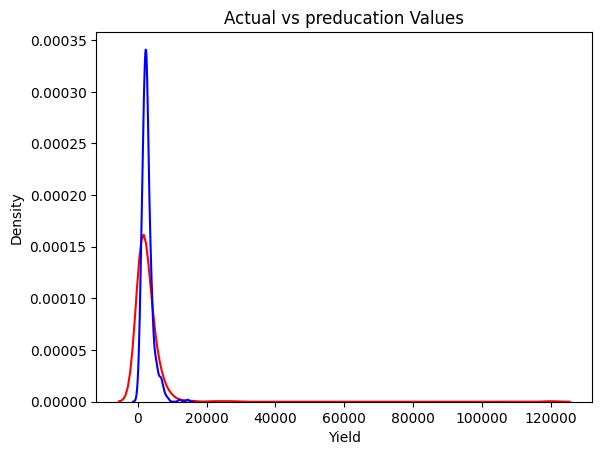

In [118]:
test_data_prediction=model1.predict(X_test)
ax1=sns.distplot(Y_test,color='r',hist=False,label='Acual value')
sns.distplot(test_data_prediction,color='b',hist=False,label='preducation',ax=ax1)
plt.title('Actual vs preducation Values')
plt.show()
plt.close()

In [119]:
model2=LinearRegression()

In [120]:
model2.fit(X_train,Y_train)

LinearRegression()

In [121]:
training_data_prediction=model2.predict(X_train)
score1=metrics.r2_score(Y_train,training_data_prediction)
score2=metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R square error: ", score1)
print("Mean Absolute Error: ", score2)

R square error:  0.015837690748505606
Mean Absolute Error:  1789.127530242233


<ipython-input-123-08c1ccdb385d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(Y_test,color='r',hist=False,label='Acual value')
<ipython-input-123-08c1ccdb385d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data_prediction,color='b',hist=False,label='preducation'

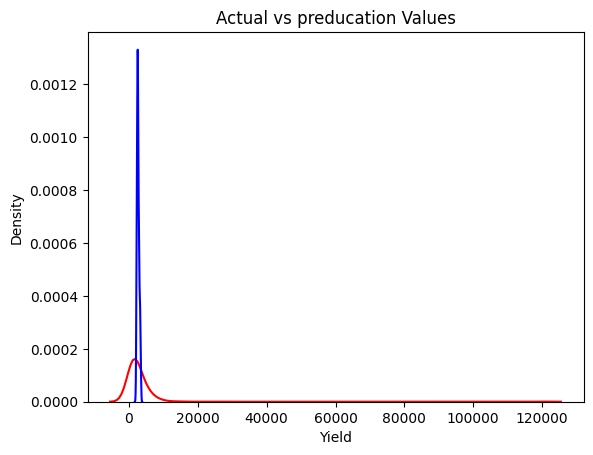

In [123]:
test_data_prediction=model2.predict(X_test)
ax1=sns.distplot(Y_test,color='r',hist=False,label='Acual value')
sns.distplot(test_data_prediction,color='b',hist=False,label='preducation',ax=ax1)
plt.title('Actual vs preducation Values')
plt.show()
plt.close()

In [124]:
model3=RandomForestRegressor()

In [125]:
model3.fit(X_train,Y_train)

RandomForestRegressor()

In [126]:
training_data_prediction=model3.predict(X_train)
score1=metrics.r2_score(Y_train,training_data_prediction)
score2=metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R square error: ", score1)
print("Mean Absolute Error: ", score2)

R square error:  0.8676174797712896
Mean Absolute Error:  668.7789375000001


<ipython-input-128-73333d6c6633>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(Y_test,color='r',hist=False,label='Acual value')
<ipython-input-128-73333d6c6633>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data_prediction,color='b',hist=False,label='preducation'

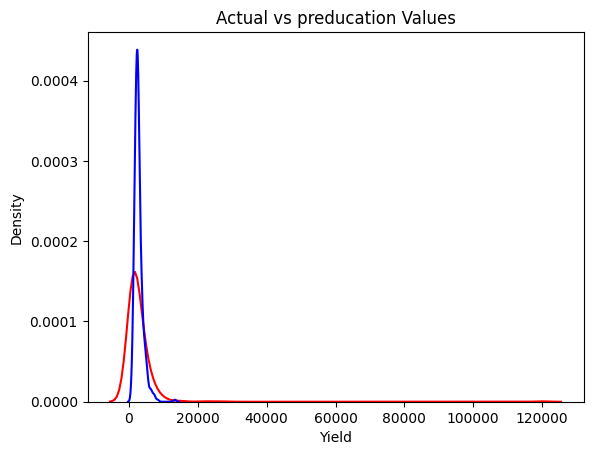

In [128]:
test_data_prediction=model3.predict(X_test)
ax1=sns.distplot(Y_test,color='r',hist=False,label='Acual value')
sns.distplot(test_data_prediction,color='b',hist=False,label='preducation',ax=ax1)
plt.title('Actual vs preducation Values')
plt.show()
plt.close()

In [129]:
model4=DecisionTreeRegressor()

In [130]:
model4.fit(X_train,Y_train)

DecisionTreeRegressor()

In [131]:
training_data_prediction=model4.predict(X_train)
score1=metrics.r2_score(Y_train,training_data_prediction)
score2=metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R square error: ", score1)
print("Mean Absolute Error: ", score2)

R square error:  1.0
Mean Absolute Error:  0.0


In [143]:
input=np.array([[26,80,83,17.08498521,16.14565756,7.528599957,71.31007253,20]])
# scaled_input=scale.fit_transform(input)
model1.predict(input)
#4000

array([4078.38], dtype=float32)

In [144]:
input=np.array([[92,60,23,18.66746724,71.516474,5.721667141,69.93293255,12]])

model1.predict(input)
#700

array([960.58093], dtype=float32)

In [149]:
input=np.array([[25,78,76,17.48042641,15.7559405,7.228963452,66.96980581,20]])
# scaled_input=scale.fit_transform(input)
model1.predict(input)
#400

array([680.8839], dtype=float32)

In [97]:
input

array([[25.        , 78.        , 76.        , 17.48042641, 15.7559405 ,
         7.22896345, 66.96980581, 20.        ]])